NameError: name 'y_pred' is not defined

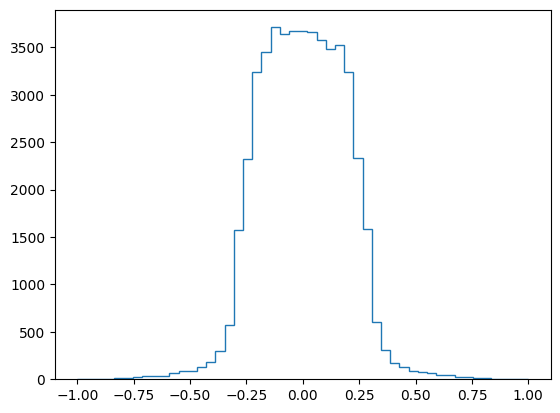

In [1]:
#import packages
#import torch
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd

#find data
inFileName = "/data/karri/smartPix/dataset-lowpt/h5FromRaw/pixel_clusters_d17201.h5"

with h5py.File(inFileName) as f:
    y_t = np.array(f["labels"])
    cotBeta = y_t[:,4]/y_t[:,5] # n_y/n_z
    y_true = pd.DataFrame(cotBeta) #[mask])

inFileName = "/home/ckumar/smartpix/pixel_clusters_d17201_Model.h5"

#with h5py.File(inFileName) as f:
#    y_p = np.array(f["data"])
#    y_pred = pd.DataFrame(y_p) #[mask])
    
#make plot
plt.hist(y_true,bins=np.linspace(-1,1,50),histtype='step',label='truth')
plt.hist(y_pred,bins=np.linspace(-1,1,50),histtype='step',label='prediction')
plt.hist(y_true-y_pred, bins=np.linspace(-1,1,50), histtype='step', label='difference')
plt.yscale('log')
plt.xlabel(r'$\cot\beta$')
plt.legend()
plt.show()

In [3]:
#find data
inFileName = "/data/karri/smartPix/dataset-lowpt/h5FromRaw/pixel_clusters_d17201.h5"

with h5py.File(inFileName) as f:
    y = np.array(f["labels"])
    cotBeta = y[:,4]/y[:,5] # n_y/n_z
    cB = pd.DataFrame(cotBeta, columns=["cotBeta"])
    cotAlpha = y[:,3]/y[:,5] # n_x/n_z 
    cA = pd.DataFrame(cotAlpha, columns = ["cotAlpha"])
    etaLabel = -np.log(abs(np.tan((1/2)*(np.arctan2(y[:,5],y[:,3]))))) #all negative values go to NaN w/np.log; abs value prevents this
    etaT = pd.DataFrame(etaLabel)
    eta = pd.DataFrame(etaT)
    phiLabel = (np.arctan2(y[:,5],y[:,4]))*(180/np.pi)
    phi = pd.DataFrame(phiLabel, columns = ["phi"]) #[mask])
    pt = y[:,8]
    pT = pd.DataFrame(pt, columns = ["pT"])
    y_local = y[:,7]
    ylocal = pd.DataFrame(y_local, columns = ["y-local"])
    
dataComp = pd.DataFrame()
dataComp = pd.concat([dataComp, cA, cB, eta, phi, pT, ylocal], axis=1)
dataLabels = pd.DataFrame(dataComp)
dataLabels.columns = ["cotAlpha", "cotBeta", "eta", "phi", "pT", "y-local"]
dataLabels.head(40)

,cotAlpha,cotBeta,eta,phi,pT,y-local
0,4.447954,0.237443,-2.197995,-103.357141,0.474891,-5.969090
1,3.108511,0.271857,-1.852213,-105.208676,0.688918,-7.337880
2,5.877655,-0.290814,-2.471464,-73.784813,-0.063535,0.314545
3,-8.539338,-0.135725,2.841242,-82.270776,-0.401913,2.772620
4,1.533651,-0.082271,-1.213286,-85.296838,0.932523,3.025720
5,2.683010,0.263106,-1.713135,-104.740758,0.433519,-6.610170
6,-4.041522,0.088708,2.104734,-95.069317,0.076041,4.247610
7,4.433288,-0.089032,-2.194773,-84.912268,-0.991306,2.148740
8,3.822152,-0.235915,-2.050650,-76.725800,0.760755,7.817310
9,6.677807,-0.129926,-2.597496,-82.597234,-0.294529,2.132480


In [4]:
len(dataLabels)

49973

In [ ]:
with h5py.File(inFileName) as f:
    x = np.array(f["data"])
    xdf = pd.D

<function matplotlib.pyplot.show(close=None, block=None)>

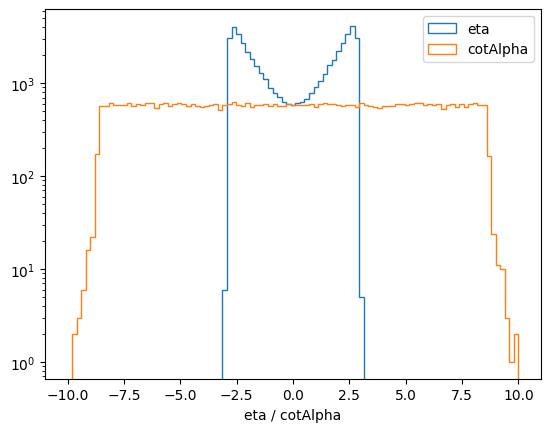

In [35]:
plt.hist(dataLabels["eta"],bins=np.linspace(-10,10,100),histtype='step',label='eta')
plt.hist(dataLabels["cotAlpha"],bins=np.linspace(-10,10,100),histtype='step',label='cotAlpha')
plt.yscale('log')
plt.xlabel('eta / cotAlpha')
plt.legend()
#plt.text(4, 4300, "$-ln|\\left[\\tan\\left(\\frac{1}{2}*\\arctan2\\left(\\frac{n_z}{n_x}\\right)\\right)\\right]|$")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

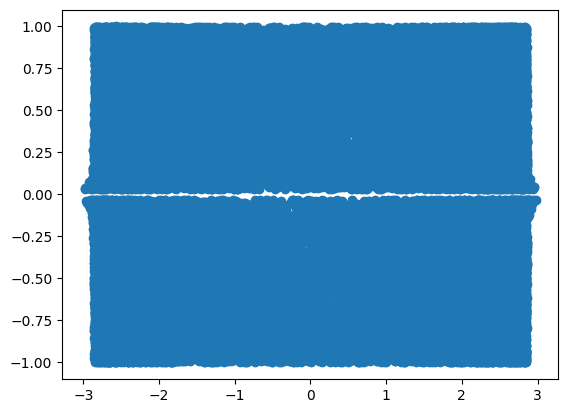

In [36]:
plt.scatter(dataLabels["eta"], dataLabels["pT"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

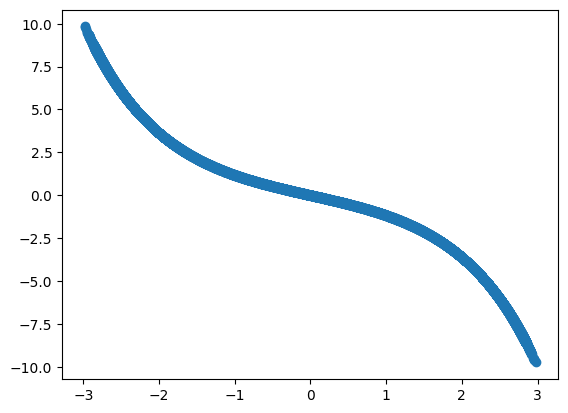

In [37]:
plt.scatter(dataLabels["eta"], dataLabels["cotAlpha"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

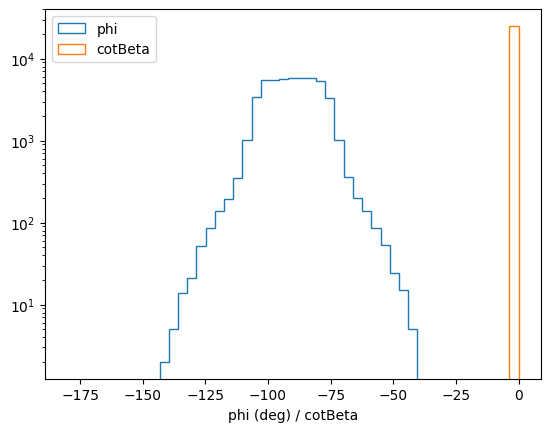

In [38]:
plt.hist(dataLabels["phi"],bins=np.linspace(-180,0,50),histtype='step',label='phi')
plt.hist(dataLabels["cotBeta"],bins=np.linspace(-180,0,50),histtype='step',label='cotBeta')
plt.yscale('log')
plt.xlabel('phi (deg) / cotBeta')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

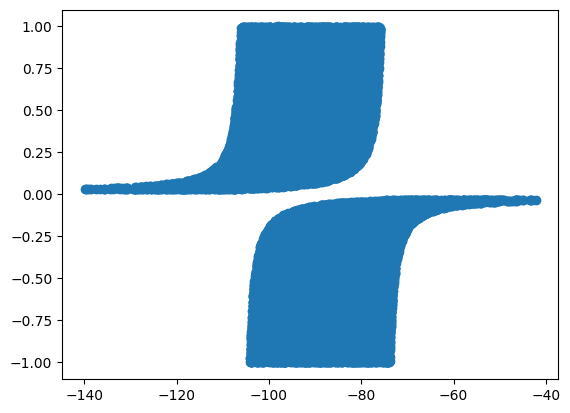

In [39]:
plt.scatter(dataLabels["phi"], dataLabels["pT"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

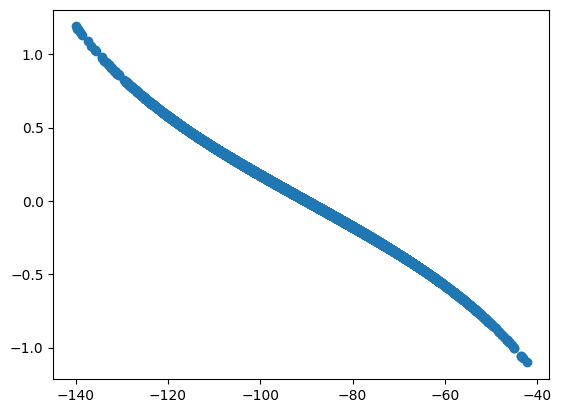

In [40]:
plt.scatter(dataLabels["phi"], dataLabels["cotBeta"])
plt.show

In [1]:
#import packages
#import torch
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd

#find data
sevenFileName = "/home/ckumar/smartpix/checkpoints/training_2023.11.02.17.59.52/logged_metrics.h5"
fourFileName = "/home/ckumar/smartpix/checkpoints/training_2023.11.03.18.26.49/logged_metrics.h5"

with h5py.File(sevenFileName) as f:
    s = np.array(f["steps"])
    v = np.array(f["values"])

print(s, v)

['epoch' 'hp_metric' 'train_loss' 'train_mse' 'val_loss_epoch'
 'val_loss_step' 'val_mse_epoch' 'val_mse_step'] ['epoch' 'hp_metric' 'train_loss' 'train_mse' 'val_loss_epoch'
 'val_loss_step' 'val_mse_epoch' 'val_mse_step']


(840,)
(840,)
(740,)
(100,)
break
(10000,)
(10000,)
(10000,)
(10000,)


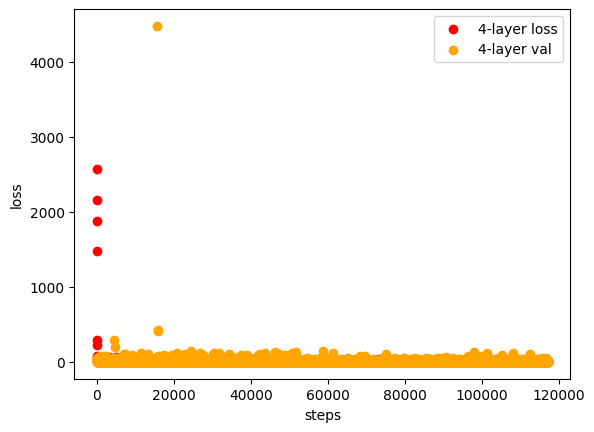

In [2]:
with h5py.File(sevenFileName) as f:
    s_e_7 = np.array(f["steps"]["epoch"][:10000])
    v_e_7 = np.array(f["values"]["epoch"][:10000])
    v_l_7 = np.array(f["values"]["train_loss"][:10000])
    v_vl_7 = np.array(f["values"]["val_loss_epoch"][:10000])

with h5py.File(fourFileName) as f:
    s_e_4 = np.array(f["steps"]["epoch"][:10000])
    v_e_4 = np.array(f["values"]["epoch"][:10000])
    v_l_4 = np.array(f["values"]["train_loss"][:10000])
    v_vl_4 = np.array(f["values"]["val_loss_step"][:10000])

print(s_e_7.shape)
print(v_e_7.shape)
print(v_l_7.shape)
print(v_vl_7.shape)
print("break")
print(s_e_4.shape)
print(v_e_4.shape)
print(v_l_4.shape)
print(v_vl_4.shape)
#plt.scatter(v_e_7, v_l_7, label="7-layer loss", color="blue")
#plt.scatter(v_e_7, v_vl_7, label="7-layer validation", color="green")
plt.scatter(s_e_4, v_l_4, label="4-layer loss", color="red")
plt.scatter(s_e_4,v_vl_4, label="4-layer val", color="orange")
plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.show()

(10000,)
[    14     29     39 ... 117154 117159 117199]
(10000,)
[ 19.14255142 115.15816498  17.07428551 ...   4.88444901   5.15763521
   5.87238503]
(10000,)
[3.79102320e+07 7.34628296e+00 4.14714200e+07 ... 5.70209122e+00
 6.35181236e+00 2.48074675e+00]
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


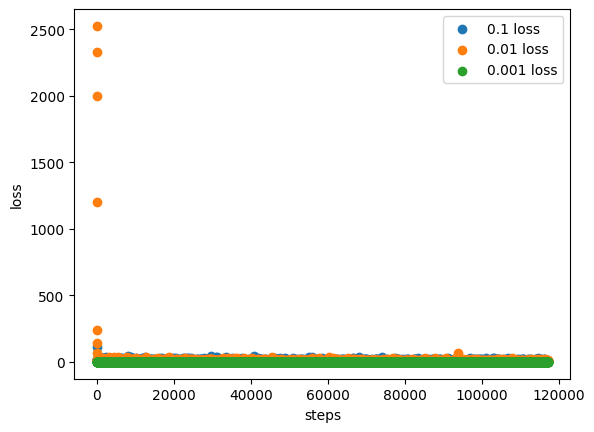

In [13]:
# 0.1 LR
with h5py.File("/home/ckumar/smartpix/checkpoints/training_2023.11.03.03.20.12/logged_metrics.h5") as f:
    s_e_1 = np.array(f["steps"]["epoch"][:10000])
    print(s_e_1.shape)
    print(s_e_1)
    v_l_1 = np.array(f["values"]["train_loss"][:10000])
    print(v_l_1.shape)
    print(v_l_1)
    v_vl_1 = np.array(f["values"]["val_loss_step"][:10000])
    print(v_vl_1.shape)
    print(v_vl_1)
    
#0.01
with h5py.File("/home/ckumar/smartpix/checkpoints/training_2023.11.02.00.50.52/logged_metrics.h5") as f:
    s_e_2 = np.array(f["steps"]["epoch"][:10000])
    print(s_e_2.shape)
    v_l_2 = np.array(f["values"]["train_loss"][:10000])
    print(v_l_2.shape)
    v_vl_2 = np.array(f["values"]["val_loss_step"][:10000])
    print(v_vl_2.shape)

#0.001
with h5py.File("/home/ckumar/smartpix/checkpoints/training_2023.11.06.18.34.17/logged_metrics.h5") as f:
    s_e_3 = np.array(f["steps"]["epoch"][:10000])
    print(s_e_3.shape)
    v_l_3 = np.array(f["values"]["train_loss"][:10000])
    print(v_l_3.shape)
    v_vl_3 = np.array(f["values"]["val_loss_step"][:10000])
    print(v_vl_3.shape)

plt.scatter(s_e_1, v_l_1, label="0.1 loss")
#plt.scatter(s_e_1, v_vl_1, label="0.1 validation")

plt.scatter(s_e_2, v_l_2, label="0.01 loss")
#plt.scatter(s_e_2, v_vl_2, label="0.01 validation")

plt.scatter(s_e_3, v_l_3, label="0.001 loss")
#plt.scatter(s_e_3, v_vl_3, label="0.001 validation")

plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.show()

outliers
1540
insiders
48433
              0
0     -1.803922
1     -1.836238
2     -1.287788
3     -1.435896
4     -1.488711
...         ...
48428 -1.425495
48429 -1.860233
48430 -1.573550
48431 -1.664428
48432 -1.555020

[48433 rows x 1 columns]


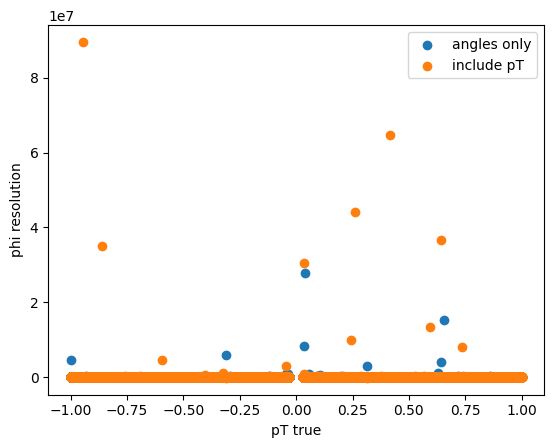

In [28]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd

with h5py.File("/data/karri/smartPix/dataset-lowpt/h5FromRaw/pixel_clusters_d17201.h5") as f:
    y_t = np.array(f["labels"])
    nx = pd.DataFrame(y_t[:,3])
    ny = pd.DataFrame(y_t[:,4])
    nz = pd.DataFrame(y_t[:,5])
    pTTrue = pd.DataFrame(y_t[:,8])
    phi = (np.arctan2(nz,ny)) 
    #print(phi)
    #phi = np.squeeze(phi)
    #print(phi)
    phiTrue = np.array(phi) #pd.DataFrame(phi)
    #phiTrue = phiTrue.iloc[(phiTrue[:,0] > -4.0)].values
    truestd = np.std(phiTrue)
    truemean = np.mean(phiTrue)
    upperbound = truestd*2 + truemean
    lowerbound = truemean - truestd*2
    trueoutliers = [x for x in phiTrue if x> upperbound or x<lowerbound]
    phiTrue = [x for x in phiTrue if x<=upperbound and x>=lowerbound]
    print("outliers")
    print(len(trueoutliers))
    print("insiders")
    print(len(phiTrue))
    phiTrue = pd.DataFrame(phiTrue)
print(phiTrue)
       
with h5py.File("/home/ckumar/smartpix/pixel_clusters_d17201_Model_morelayers_0.01lr-32b.h5") as f:
    outthree = np.array(f["outputs"])
    phithree = (outthree[:,1]) 
    #phithree = phithree.loc[np.abs(phithree) < 4.0]
    phiThree = np.array(phithree)
    """threestd = np.std(phiThree)
    threemean = np.mean(phiThree)
    upperbound3 = threestd*2 + threemean
    lowerbound3 = threemean - threestd*2
    threeoutliers = [x for x in phiThree if x> upperbound3 or x<lowerbound3]
    phiThree = [x for x in phiThree if x<=upperbound3 and x>=lowerbound3]
    print("outliers")
    print(len(threeoutliers))
    print("insiders")
    print(len(phiThree))"""
    phiThree = pd.DataFrame(phiThree)
    
with h5py.File("/home/ckumar/smartpix/pixel_clusters_d17201_Model_morelayers_0.01lr-32b-twolabels.h5a") as f:
    outtwo = np.array(f["outputs"])
    phitwo = (outtwo[:,1]) 
    #phitwo = phitwo.loc[np.abs(phitwo) < 4.0]
    phiTwo = np.array(phitwo)
    """twostd = np.std(phiTwo)
    twomean = np.mean(phiTwo)
    upperbound2 = twostd*2 + twomean
    lowerbound2 = twomean - twostd*2
    twooutliers = [x for x in phiTwo if x> upperbound2 or x<lowerbound2]
    phiTwo = [x for x in phiTwo if x<=upperbound2 and x>=lowerbound2]
    print("outliers")
    print(len(twooutliers))
    print("insiders")
    print(len(phiTwo))"""
    phiTwo = pd.DataFrame(phiTwo)

plt.scatter(pTTrue, ((phiTrue-phiTwo)/phiTrue), label="angles only")
plt.scatter(pTTrue, ((phiTrue-phiThree)/phiTrue), label="include pT")
plt.ylabel('phi resolution')
plt.xlabel('pT true')
plt.legend()
plt.show()